In [1]:
%load_ext pyspecdata.ipy

Populating the interactive namespace from numpy and matplotlib


here, we give an example of how to use jupyter to quickly inspect raw data -- first just open a file (note the filename is really long, but I only need to give an identifiable/unique set of characters for the name)

First, edit the `exp_type` and filename to see the nodes available in the file you want to look at.

This gives an error, but the error includes the names of the nodes:

In [2]:
d = find_file('230320.*A174', exp_type='ODNP_NMR_comp/ODNP')

ValueError: please select a node from the list and set to expno:
	FIR_27.5dBm
	FIR_30.5dBm
	FIR_32.5dBm
	FIR_33.5dBm
	FIR_34.5dBm
	FIR_35.5dBm
	FIR_36.0dBm
	FIR_noPower
	ODNP
	control_thermal

In [59]:
d = find_file('230320.*A174', exp_type='ODNP_NMR_comp/ODNP', expno='FIR_36.0dBm')
d.reorder('t2', first=False)
if 'ph2' in d.dimlabels:
    d.reorder('ph2')
d.reorder('ph1'); # the semicolon supresses printed output in jupyter

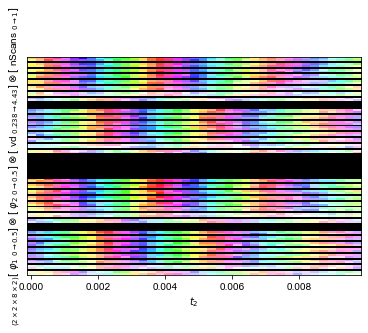

In [60]:
image(d)

This guy has a couple signal averages, so let's do that

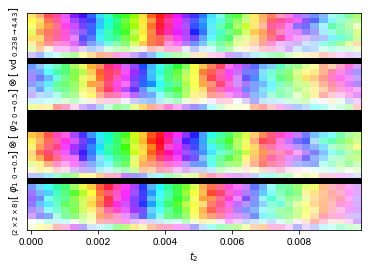

In [61]:
if 'nScans' in d.dimlabels:
    d.mean('nScans')
    image(d)

Now, go ahead and look at the DCCT

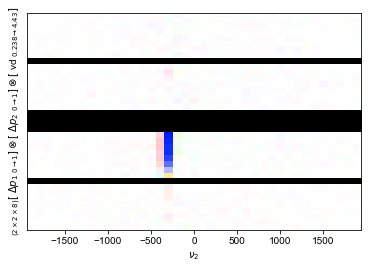

In [62]:
d.ft('t2',shift=True)
d.ft('ph1', unitary=True)
if 'ph2' in d.dimlabels:
    d.ft('ph2', unitary=True)
image(d)

finally, let's zoom in on the signal here

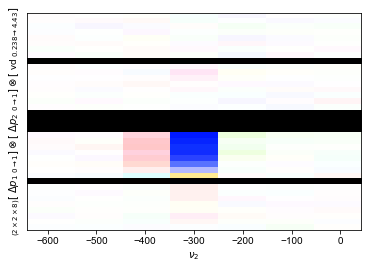

In [63]:
image(d['t2':(-600,0)])

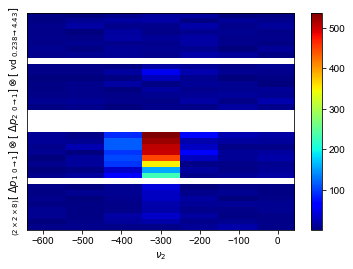

In [64]:
image(abs(d['t2':(-600,0)]))

manually integrate some signal here -- just do abs

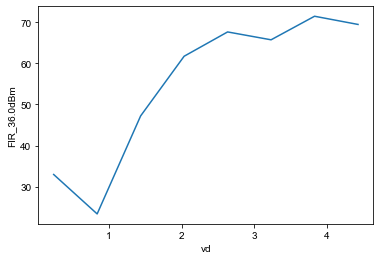

In [67]:
plot(abs(d['t2':(-500,0)]['ph1',0]['ph2',1].C.mean('t2')))

In [ ]:
d[]